In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

# DEEP2

In [ ]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

In [ ]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [ ]:
path_best+'/dict.p'

## experiments

In [4]:
path                                  =  './models/test_shuffle/sneaky/DEEP2/bayes_opt/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 0.0031735
time_dim     : 21
encoder      : [368, 120]
decoder      : [386]
vector       : 368
AUC_v        : 0.6825618575185275


In [5]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## Min plus linear

In [6]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/min_pos_linear')
# CMA_ES(dict_c).main(data,path,dict_)

In [7]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

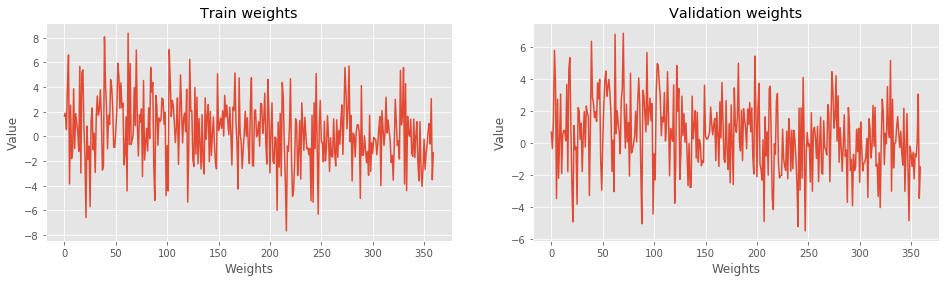

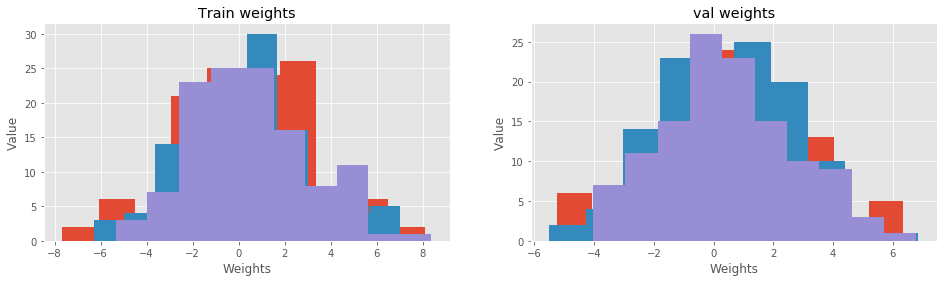

In [8]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

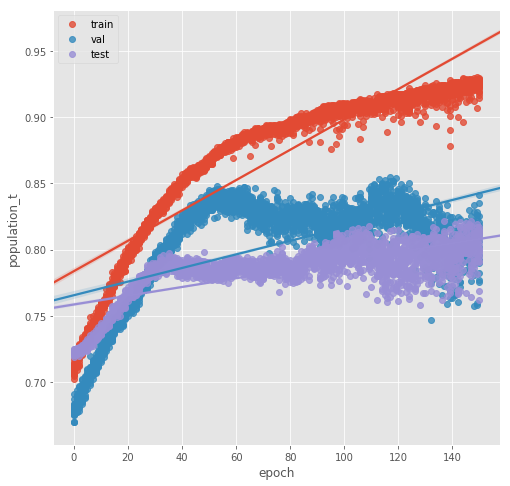

In [9]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

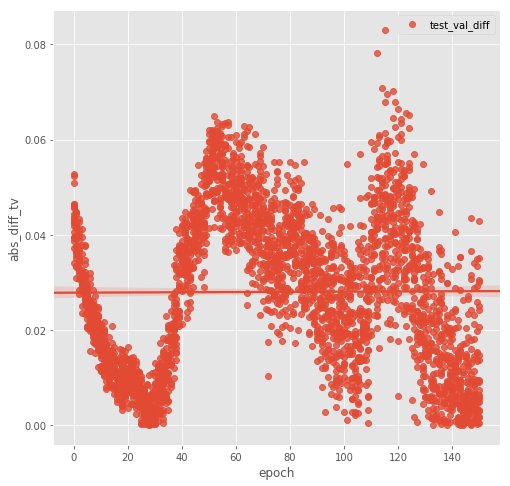

In [10]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()


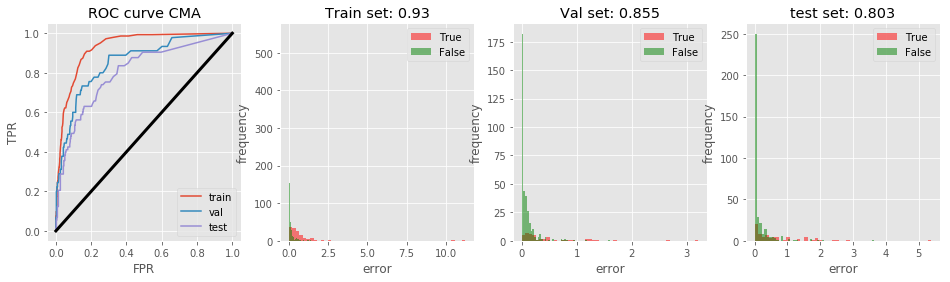

In [11]:
BO_vis.plot_cma(data)

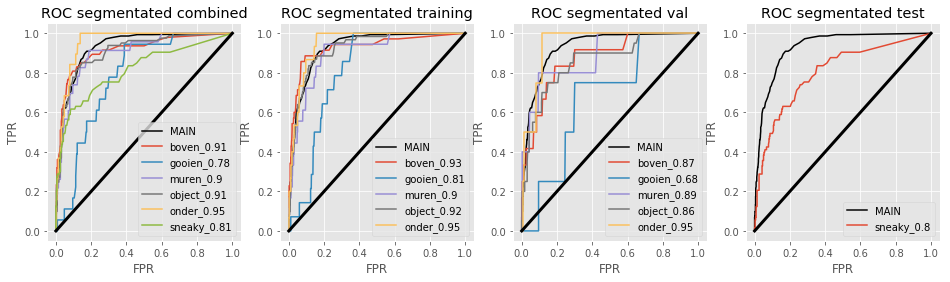

In [12]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

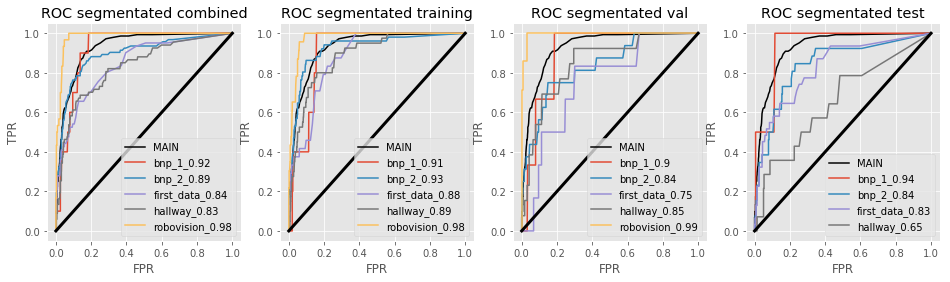

In [13]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus linear

In [14]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_linear')
# CMA_ES(dict_c).main(data,path,dict_)

In [15]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

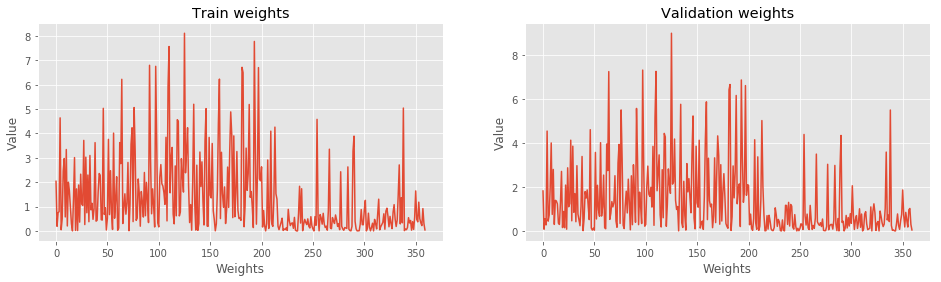

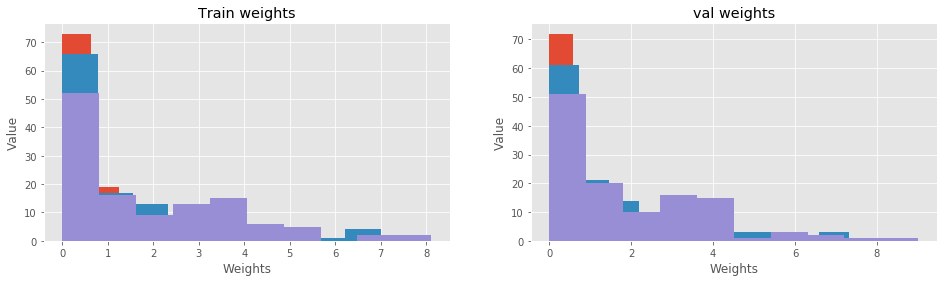

In [16]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

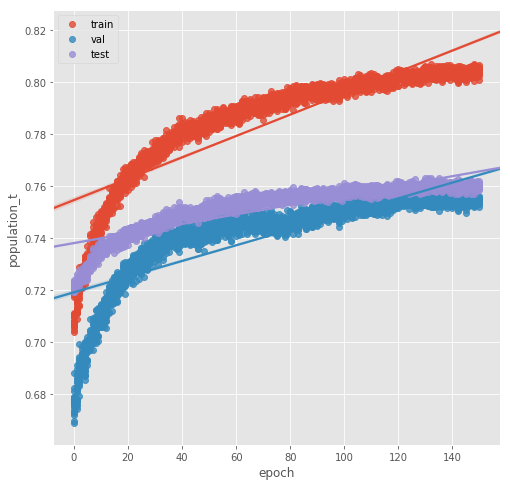

In [17]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

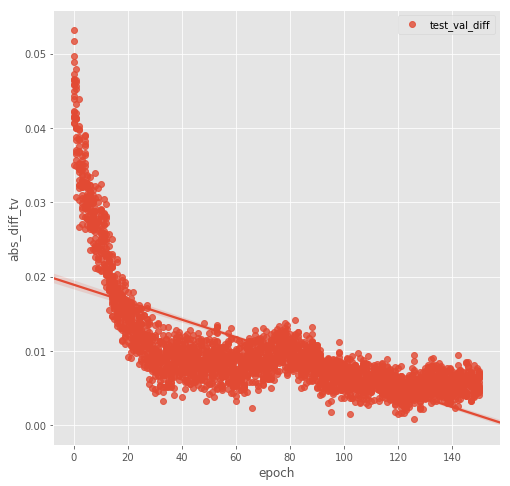

In [18]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

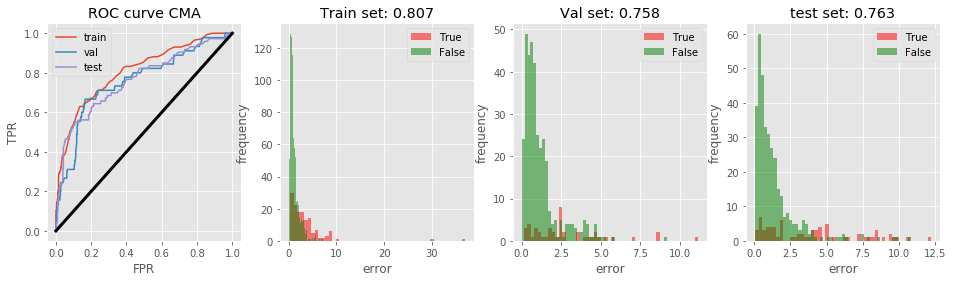

In [19]:
BO_vis.plot_cma(data)

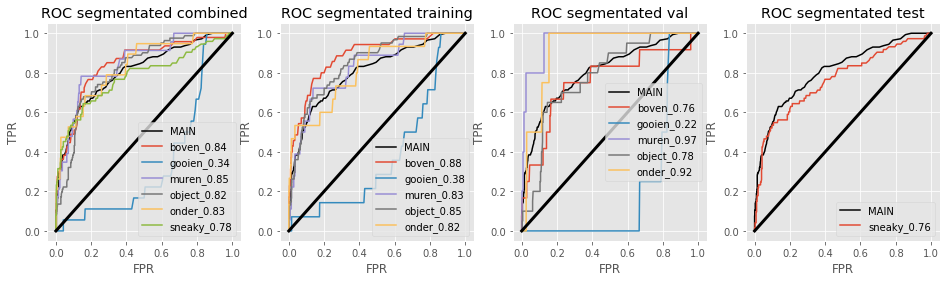

In [20]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

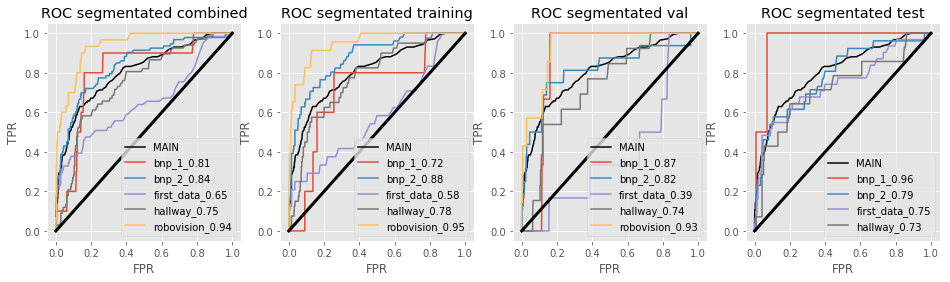

In [21]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min sigmoid

In [22]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [23]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

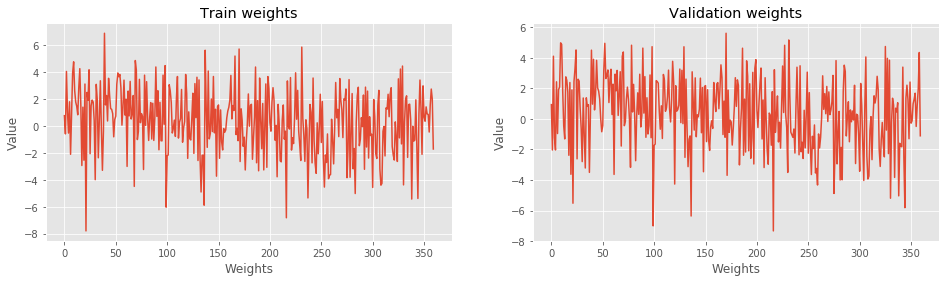

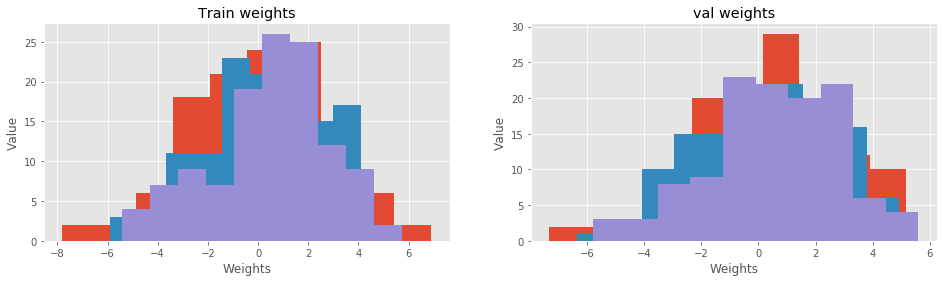

In [24]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

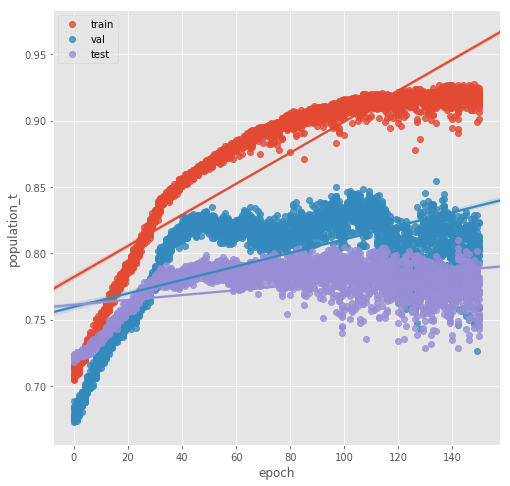

In [25]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

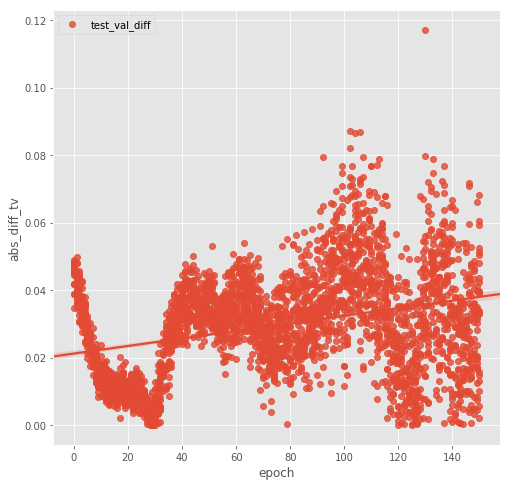

In [26]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

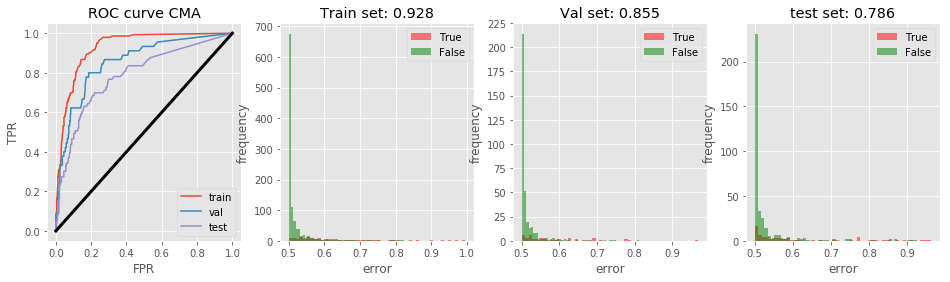

In [27]:
BO_vis.plot_cma(data)

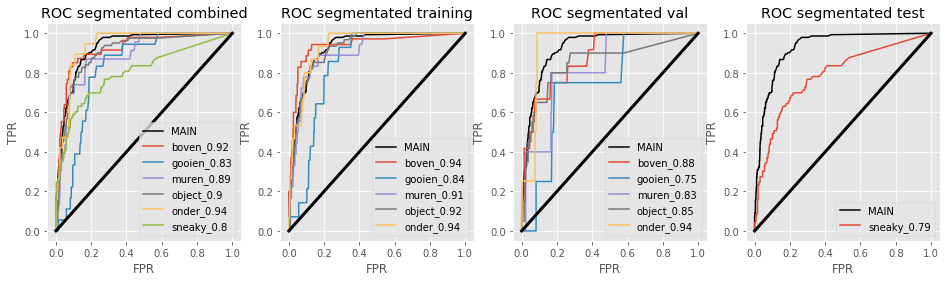

In [28]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

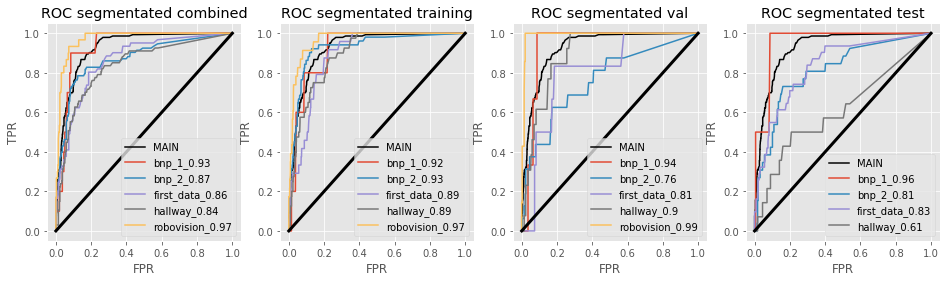

In [29]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min relu

In [30]:
dict_c = return_dict()
dict_c['mode']   = 'relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_relu')
# CMA_ES(dict_c).main(data,path,dict_)

In [31]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

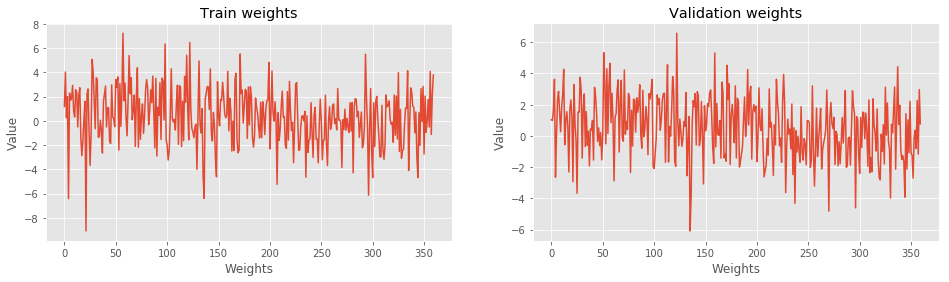

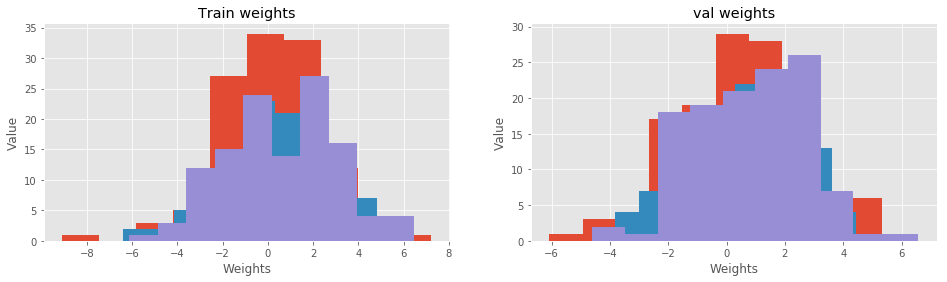

In [32]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

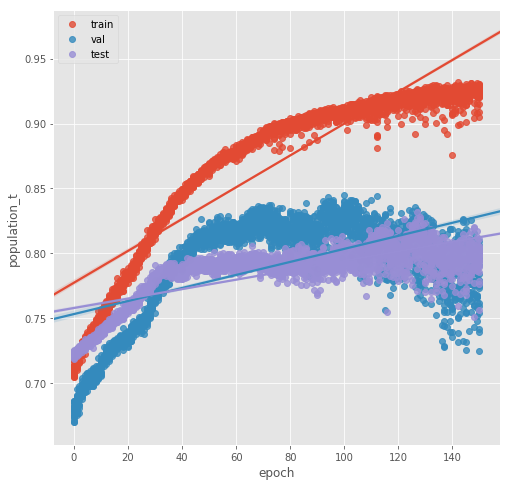

In [33]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

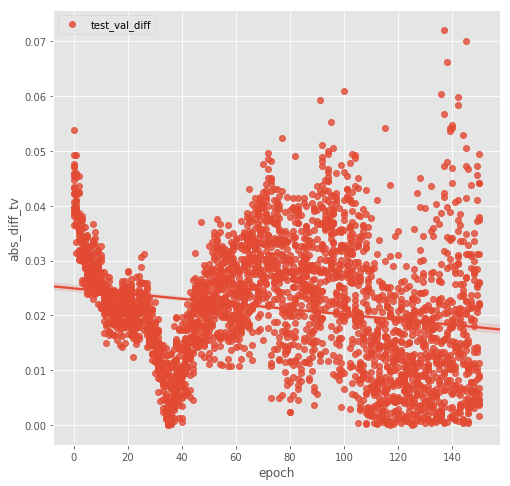

In [34]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

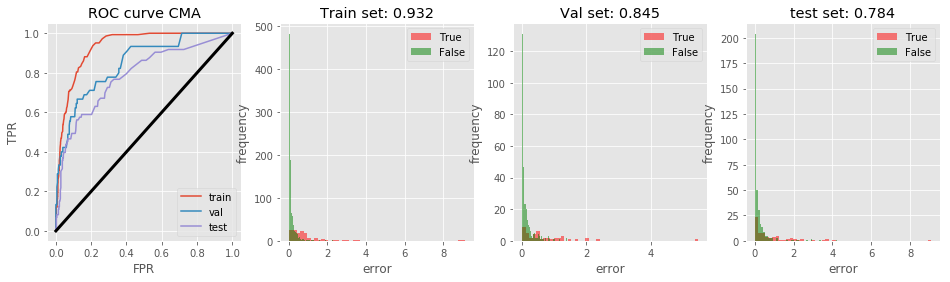

In [35]:
BO_vis.plot_cma(data)

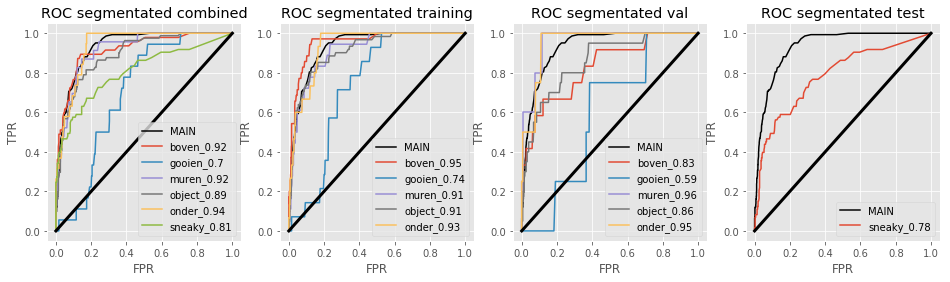

In [36]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

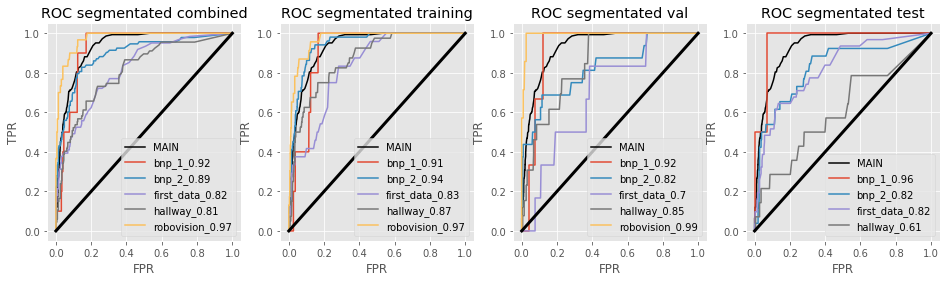

In [37]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu

In [10]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=749558, Mon May  7 12:00:18 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.196484525764226e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:40.2
    2     42 -7.210876121072565e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:46.3
    3     63 -7.277764331085192e-01 1.0e+00 4.03e-01  4e-01  4e-01 0:53.6
    4     84 -7.326368673421993e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:01.5
    5    105 -7.360319755081214e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:08.4
    6    126 -7.393387716119240e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:13.8
    7    147 -7.437053124611590e-01 1.0e+00 3.87e-01  4e-01  4e-01 1:20.3
    8    168 -7.477774797699961e-01 1.0e+00 3.84e-01  4e-01  4e-01 1:28.1
    9    189 -7.535308470762165e-01 1.0e+00 3.81e-01  4e-01  4e-01 1:33.9
   10    210 -7.566446649702029e-01 1.0e+00 3.79e-01  4e-01  4e-01 1:38.6
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.592318

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.189426102428909e-01 1.2e+00 4.72e-01  5e-01  5e-01 19:52.4
  102   2142 -9.198813347550485e-01 1.2e+00 4.74e-01  5e-01  5e-01 20:01.2
  103   2163 -9.199467510973592e-01 1.2e+00 4.75e-01  5e-01  5e-01 20:08.5
  104   2184 -9.206238102402743e-01 1.2e+00 4.76e-01  5e-01  5e-01 20:16.6
  105   2205 -9.199761884513989e-01 1.2e+00 4.77e-01  5e-01  5e-01 20:24.1
  106   2226 -9.212223697724166e-01 1.2e+00 4.79e-01  5e-01  5e-01 20:31.5
  107   2247 -9.213074110174204e-01 1.2e+00 4.80e-01  5e-01  5e-01 20:38.5
  108   2268 -9.215036600443524e-01 1.2e+00 4.81e-01  5e-01  5e-01 20:48.1
  109   2289 -9.221316569305343e-01 1.2e+00 4.82e-01  5e-01  5e-01 20:56.3
  110   2310 -9.215232849470454e-01 1.2e+00 4.83e-01  5e-01  5e-01 21:04.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.212845152976116e-01 1.2e+00 4.84e-01  5e-01  5e-01 22:05.3
  112   2352 -9.217685962307104

In [11]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

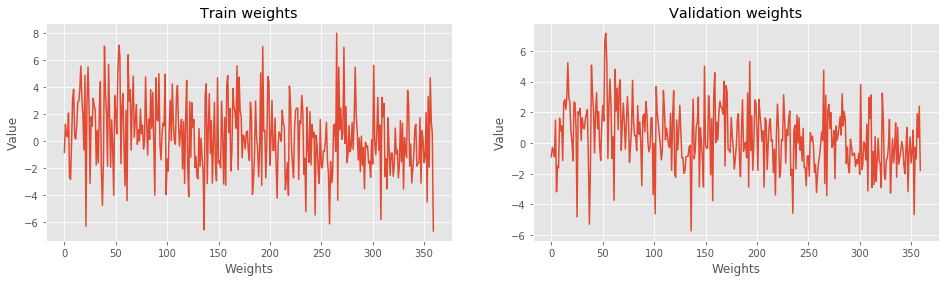

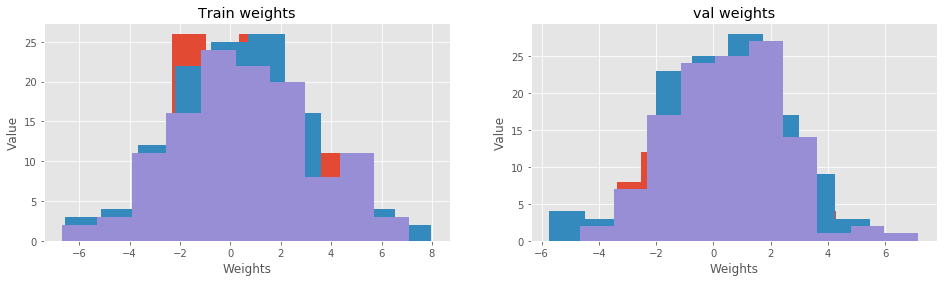

In [12]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

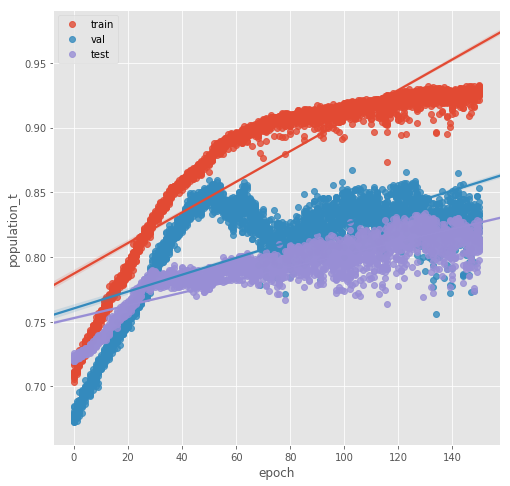

In [13]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

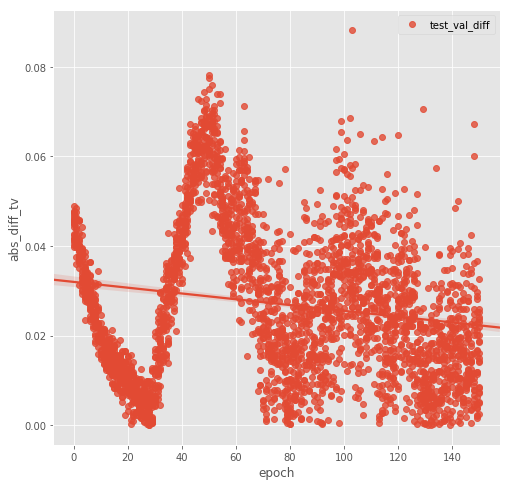

In [14]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

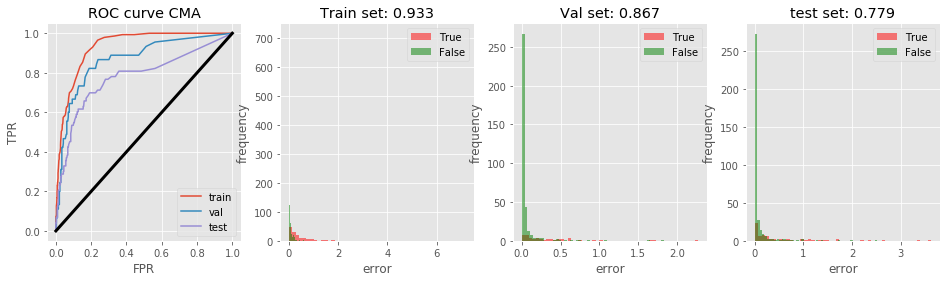

In [15]:
BO_vis.plot_cma(data)

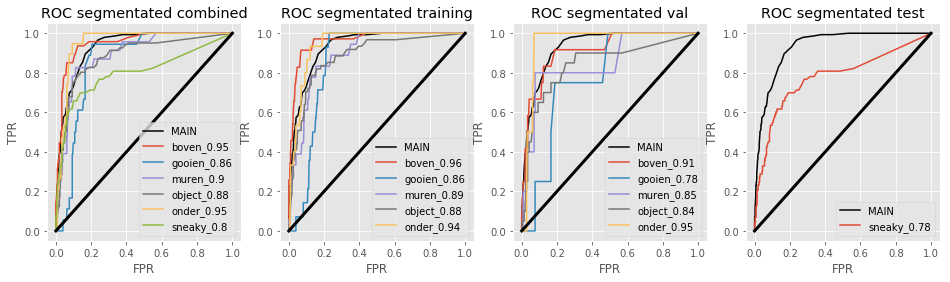

In [16]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

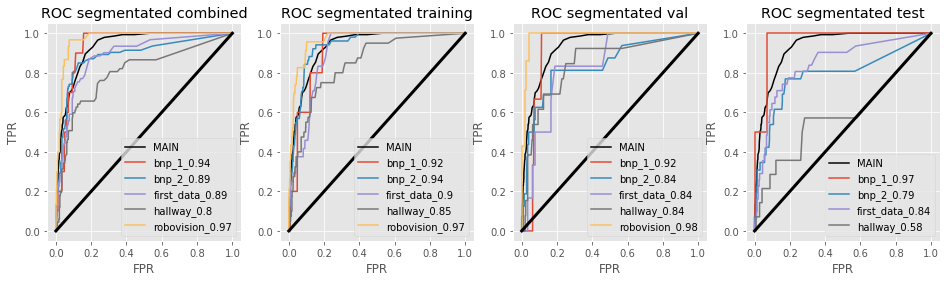

In [17]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu C

In [18]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu_C'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu_C')
# CMA_ES(dict_c).main(data,path,dict_)

In [19]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

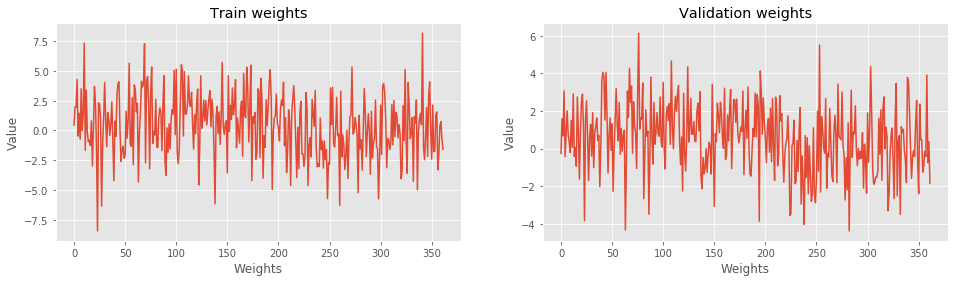

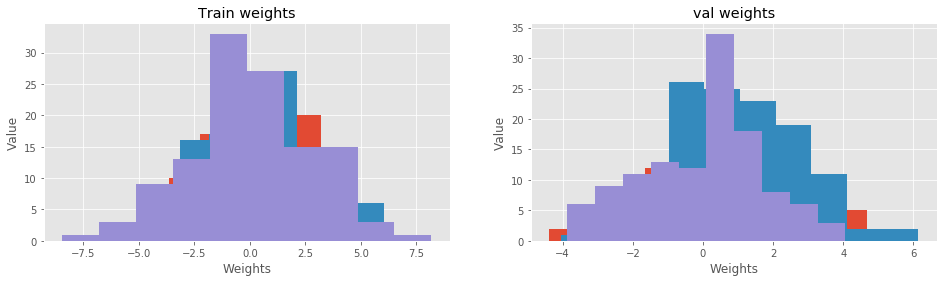

In [20]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

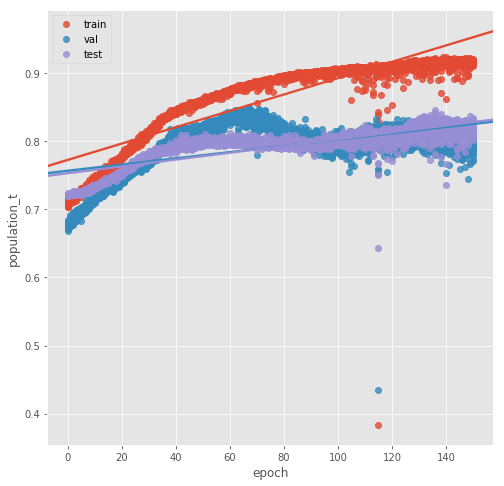

In [21]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

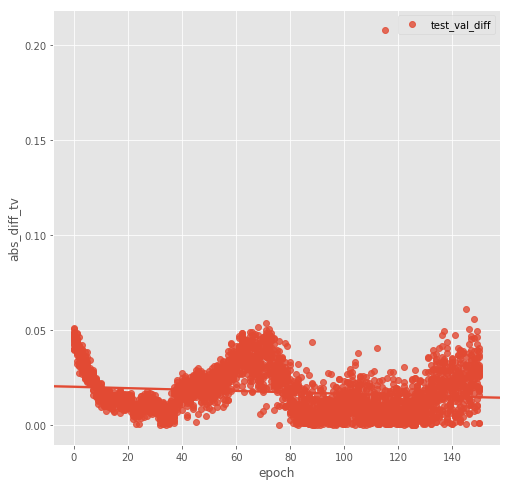

In [22]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

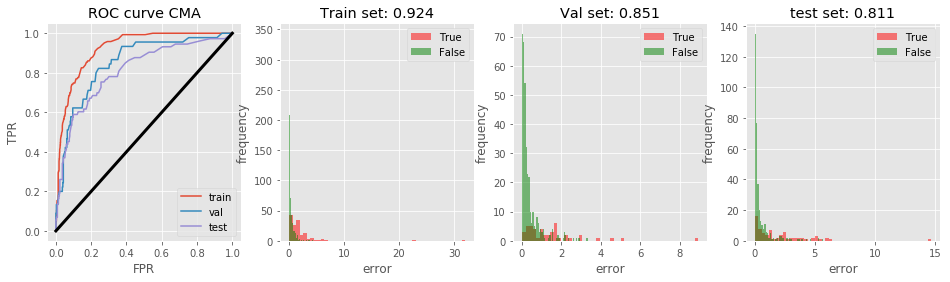

In [23]:
BO_vis.plot_cma(data)

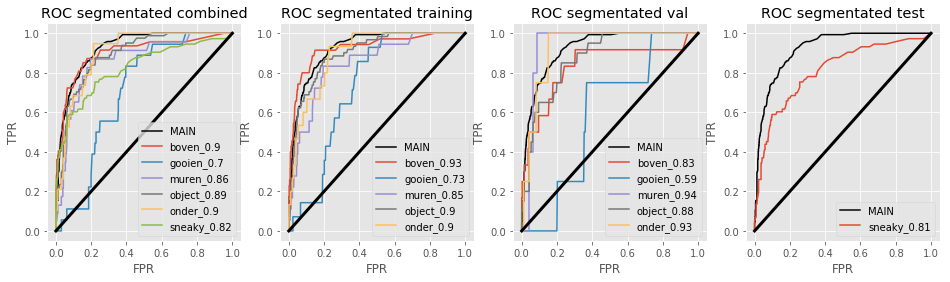

In [24]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

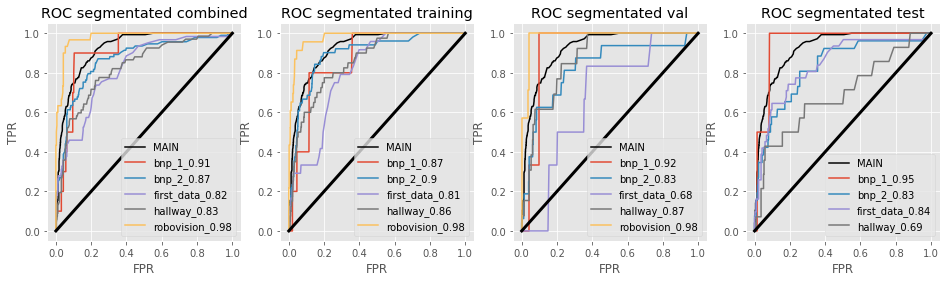

In [25]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [54]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0.,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [55]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

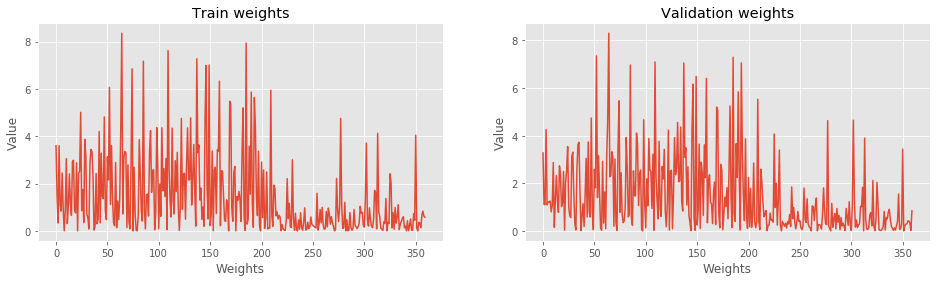

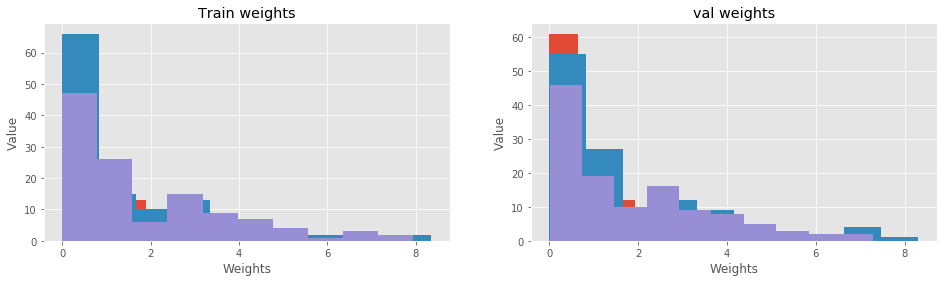

In [56]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

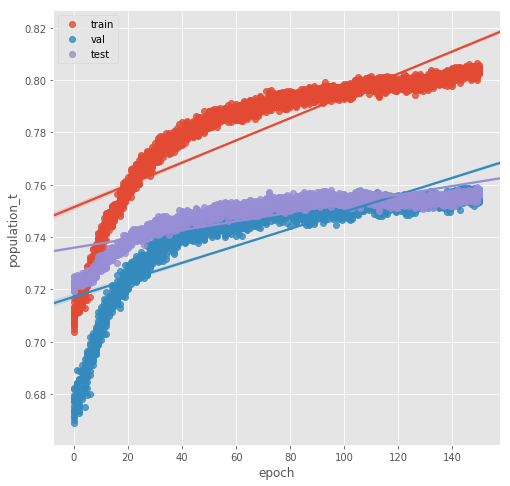

In [57]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

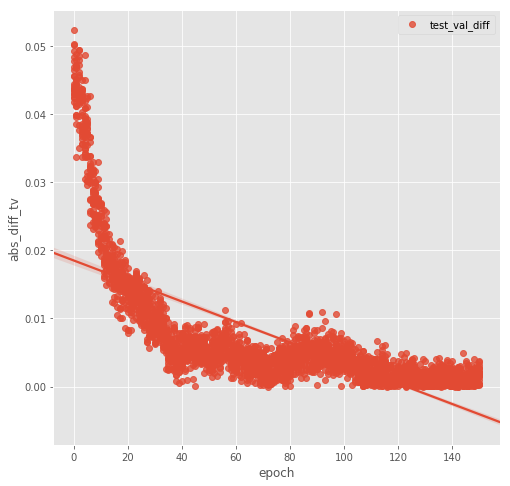

In [58]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

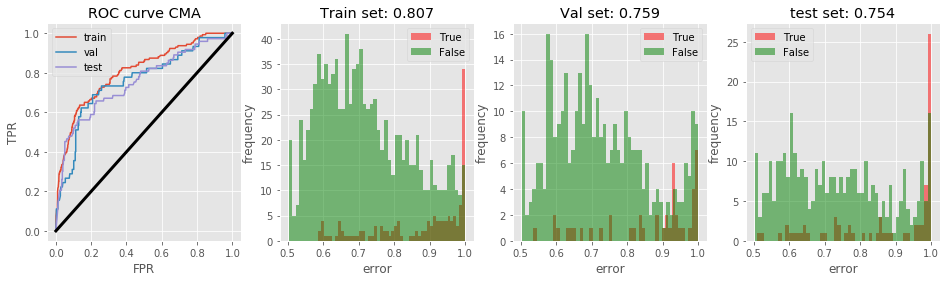

In [59]:
BO_vis.plot_cma(data)

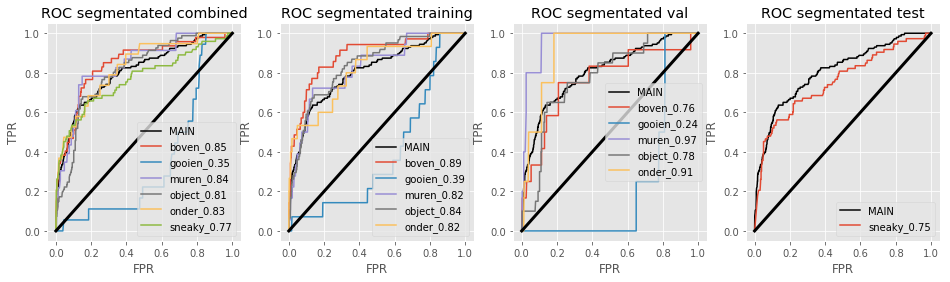

In [60]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

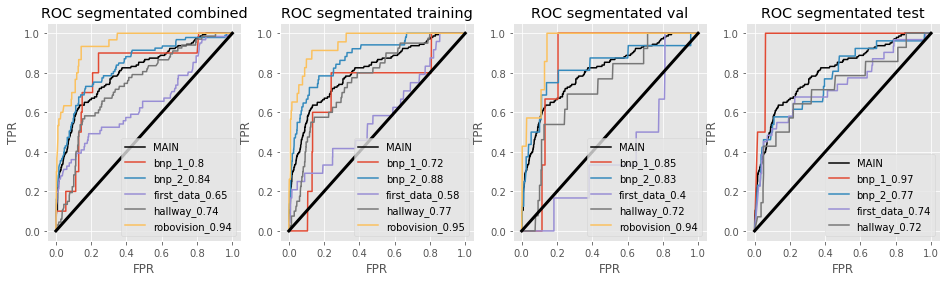

In [61]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid FL

In [62]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid_FL'
dict_c['bounds'] = [0.,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid_FL')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=753042, Mon May  7 10:03:51 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.183368549130943e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:59.2
    2     42 -7.196124735881518e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:11.0
    3     63 -7.214604852584271e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:23.5
    4     84 -7.280282860264152e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:37.4
    5    105 -7.282016393335383e-01 1.0e+00 3.93e-01  4e-01  4e-01 1:52.8
    6    126 -7.304879404972950e-01 1.0e+00 3.89e-01  4e-01  4e-01 2:09.4
    7    147 -7.342657342657343e-01 1.0e+00 3.86e-01  4e-01  4e-01 2:27.5
    8    168 -7.394205420398123e-01 1.0e+00 3.82e-01  4e-01  4e-01 2:42.8
    9    189 -7.395971661640511e-01 1.0e+00 3.79e-01  4e-01  4e-01 2:59.3
   10    210 -7.420044875610825e-01 1.0e+00 3.76e-01  4e-01  4e-01 3:17.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.454192

  100   2100 -7.972584010937612e-01 1.1e+00 3.37e-01  3e-01  3e-01 43:49.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -7.989199761884515e-01 1.1e+00 3.37e-01  3e-01  3e-01 45:30.3
  102   2142 -8.002184905833175e-01 1.1e+00 3.37e-01  3e-01  3e-01 45:49.0
  103   2163 -7.987008314417108e-01 1.1e+00 3.37e-01  3e-01  3e-01 46:13.8
  104   2184 -7.995904936971354e-01 1.1e+00 3.37e-01  3e-01  3e-01 46:35.5
  105   2205 -7.982887084851538e-01 1.1e+00 3.37e-01  3e-01  3e-01 46:58.1
  106   2226 -7.980924594582219e-01 1.1e+00 3.37e-01  3e-01  3e-01 47:16.6
  107   2247 -7.995610563430957e-01 1.1e+00 3.37e-01  3e-01  3e-01 47:35.6
  108   2268 -7.998914088717644e-01 1.1e+00 3.37e-01  3e-01  3e-01 47:56.3
  109   2289 -8.000385956419633e-01 1.1e+00 3.37e-01  3e-01  3e-01 48:17.9
  110   2310 -7.999600960311904e-01 1.1e+00 3.37e-01  3e-01  3e-01 48:41.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.006960298821851

In [63]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

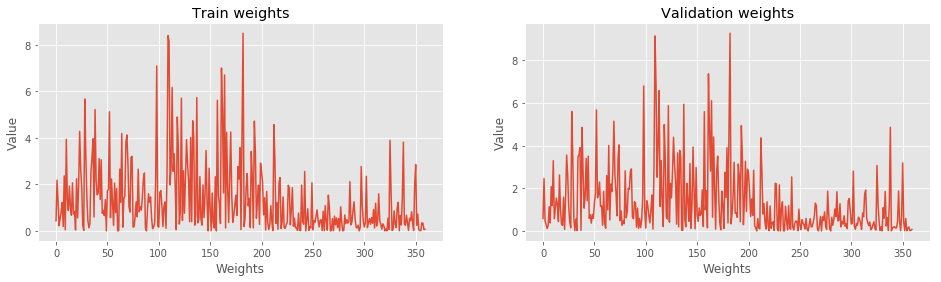

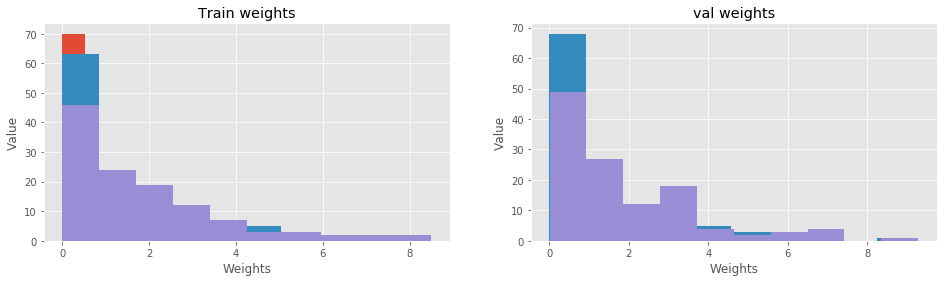

In [64]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

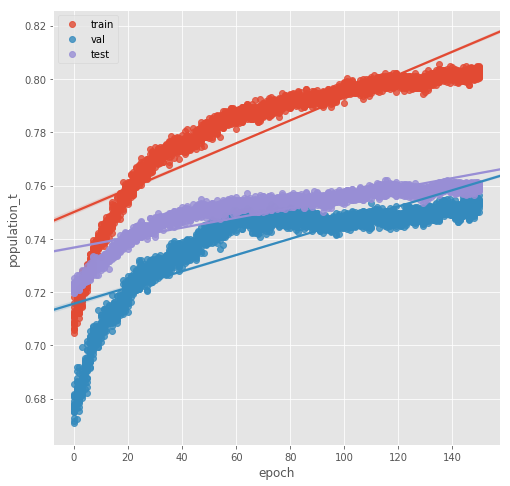

In [65]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

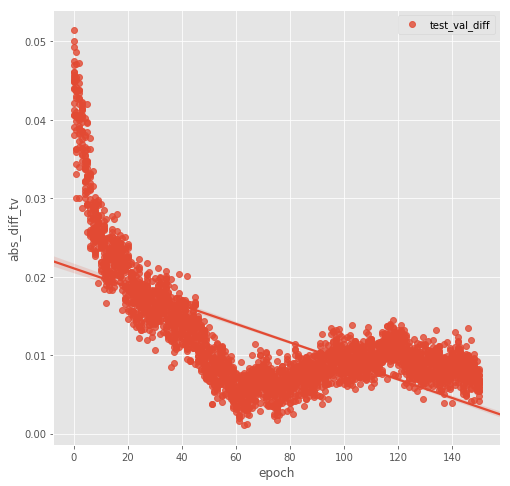

In [66]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

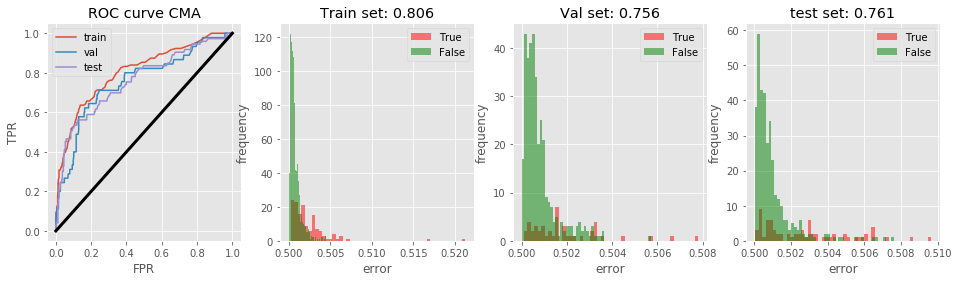

In [67]:
BO_vis.plot_cma(data)

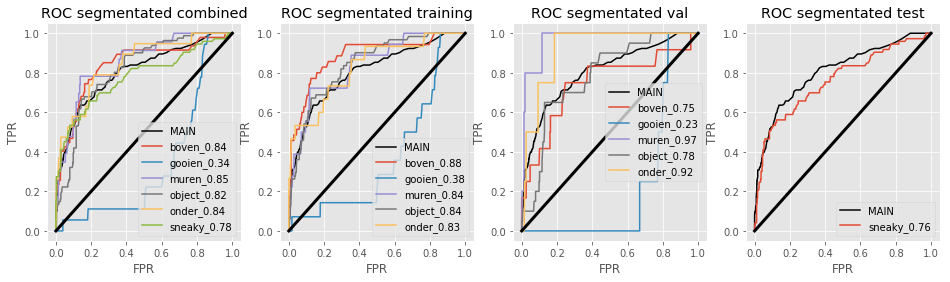

In [68]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

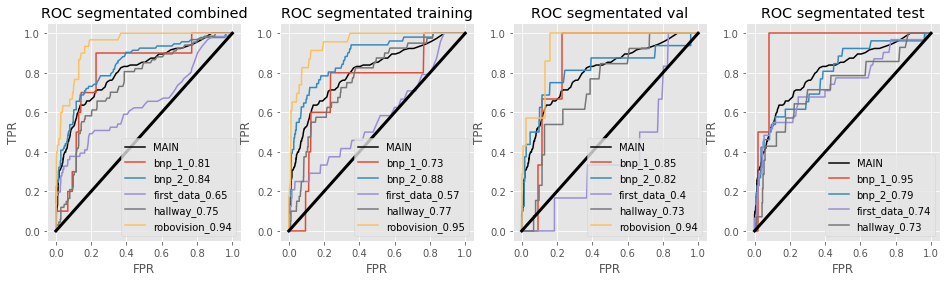

In [69]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## leaky relu c sigmoid

In [4]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu_C_sigmoid'
dict_c['bounds'] = [-100.,100]
path   = path_best.replace('bayes_opt','CMA_ES/leaky_relu_C_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 362 (seed=795773, Mon May  7 11:20:31 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.164692183401257e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:56.6
    2     42 -7.204432611354968e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:04.9
    3     63 -7.244336580164457e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:12.9
    4     84 -7.303440245442115e-01 1.0e+00 3.99e-01  4e-01  4e-01 1:22.4
    5    105 -7.324635140350764e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:31.6
    6    126 -7.368922004095063e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:40.1
    7    147 -7.419194463160788e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:49.9
    8    168 -7.453243669333471e-01 1.0e+00 3.83e-01  4e-01  4e-01 1:57.9
    9    189 -7.480031661509677e-01 1.0e+00 3.80e-01  4e-01  4e-01 2:06.5
   10    210 -7.515781692582442e-01 1.0e+00 3.78e-01  4e-01  4e-01 2:15.2
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.534850

  100   2100 -8.965669503555378e-01 1.2e+00 4.60e-01  5e-01  5e-01 21:01.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -8.990625838146886e-01 1.2e+00 4.62e-01  5e-01  5e-01 22:05.3
  102   2142 -8.999260795331890e-01 1.2e+00 4.63e-01  5e-01  5e-01 22:12.1
  103   2163 -8.987060647490956e-01 1.2e+00 4.65e-01  5e-01  5e-01 22:20.2
  104   2184 -8.988238141652547e-01 1.2e+00 4.66e-01  5e-01  5e-01 22:28.5
  105   2205 -8.985228989906259e-01 1.2e+00 4.68e-01  5e-01  5e-01 22:37.9
  106   2226 -8.977019238946273e-01 1.2e+00 4.70e-01  5e-01  5e-01 22:46.5
  107   2247 -8.979832141665631e-01 1.2e+00 4.71e-01  5e-01  5e-01 22:54.9
  108   2268 -8.989938966552624e-01 1.2e+00 4.73e-01  5e-01  5e-01 23:02.7
  109   2289 -9.012409480136327e-01 1.2e+00 4.74e-01  5e-01  5e-01 23:11.2
  110   2310 -9.007830336174584e-01 1.2e+00 4.76e-01  5e-01  5e-01 23:18.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.022287347825233

In [5]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

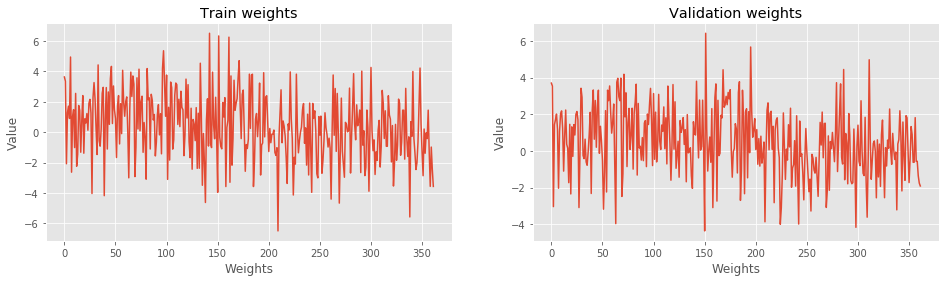

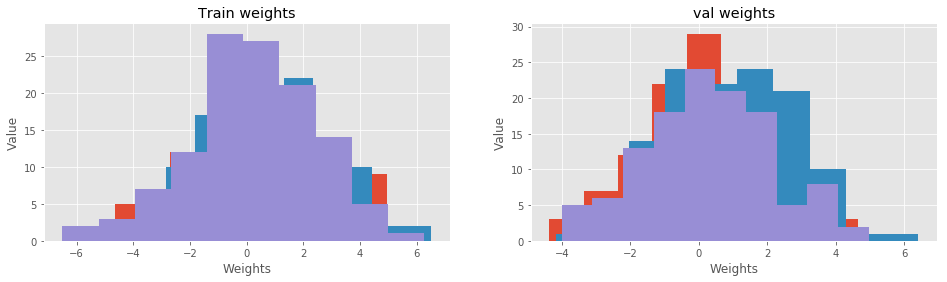

In [6]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

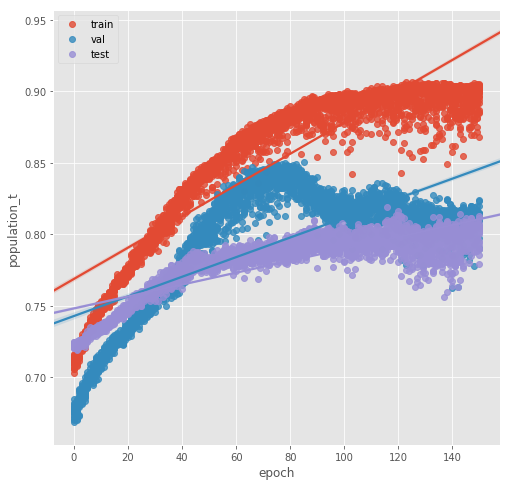

In [7]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

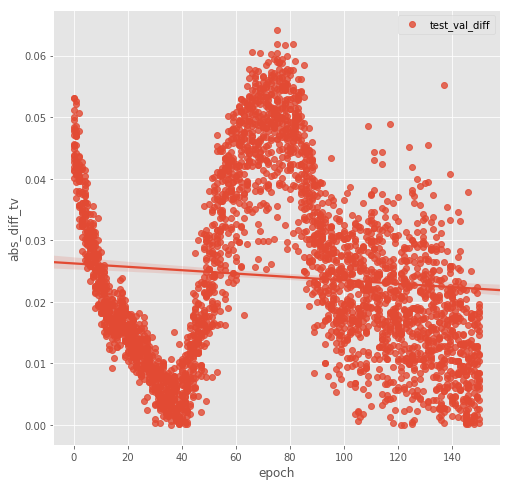

In [8]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

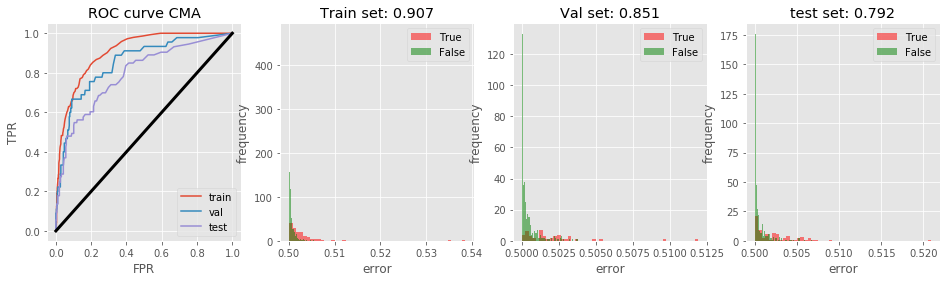

In [9]:
BO_vis.plot_cma(data)

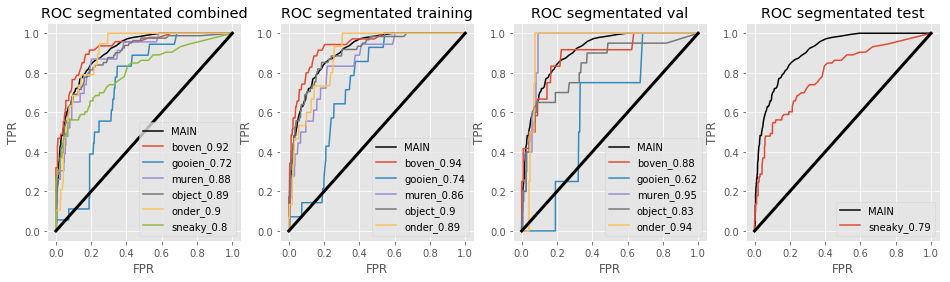

In [10]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

In [ ]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)